# Example: Bayesian Neural Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

#### Running the code for a given number of chains and epochs

In [2]:
num_chains = 6
num_epochs = 10000

In [3]:
! mpiexec -n {num_chains} python -m mpi4py parallel_tempering_bnn.py {num_epochs}

acceptance for temp=1.5: 30.31%, exchange: 23.12%
acceptance for temp=1: 22.79%, exchange: 49.75%
Total time: 6.933525800704956
acceptance for temp=3.0: 46.04%, exchange: 44.22%
acceptance for temp=4.5: 55.47%, exchange: 63.82%
acceptance for temp=6.0: 61.33%, exchange: 63.32%
acceptance for temp=7.5: 64.81%, exchange: 0.00%


In [4]:
all_values = np.zeros(shape=(num_chains, num_epochs, 16))
all_energies = np.zeros(shape=(num_chains, num_epochs))

for i in range(num_chains):
    data = np.load(f'results/process_{i}.npy', allow_pickle=True)
    values = data[:,0]
    energy = data[:,1]
    values = np.array([val[0] for val in values])
    all_values[i] = values
    all_energies[i] = energy
    
print(all_values.shape, all_energies.shape)

(6, 10000, 16) (6, 10000)


#### Plotting the results

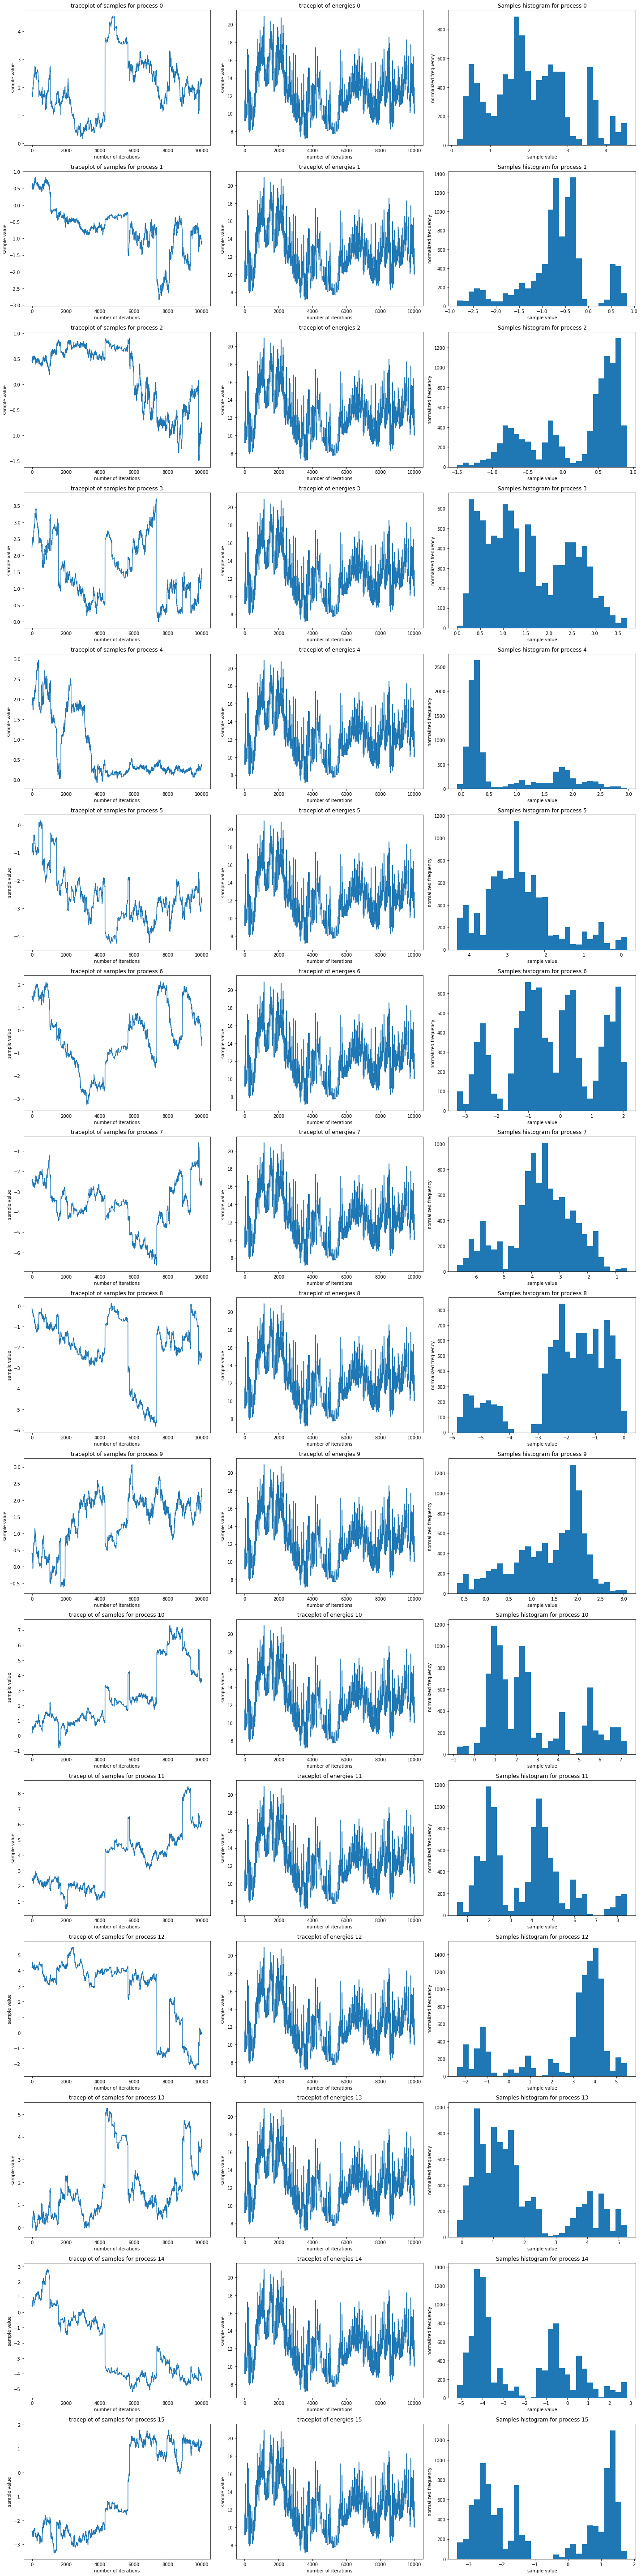

In [5]:
xgrid = np.linspace(-30,50,200)
fig, ax = plt.subplots(nrows=16, ncols=3, figsize=(20,5*16))
ax = ax.ravel()

for i in range(16):
    ax[3*i+0].plot(range(num_epochs), all_values[0][:,i])
    ax[3*i+0].set_title(f'traceplot of samples for process {i}')
    ax[3*i+0].set_ylabel('sample value')
    ax[3*i+0].set_xlabel('number of iterations')
    
    ax[3*i+1].plot(range(num_epochs), all_energies[0])
    ax[3*i+1].set_title(f'traceplot of energies {i}')
    ax[3*i+1].set_ylabel('sample value')
    ax[3*i+1].set_xlabel('number of iterations')

    ax[3*i+2].hist(all_values[0][:,i], bins=30, density=False)
    ax[3*i+2].set_title(f'Samples histogram for process {i}')
    ax[3*i+2].set_ylabel('normalized frequency')
    ax[3*i+2].set_xlabel('sample value')
fig.tight_layout()

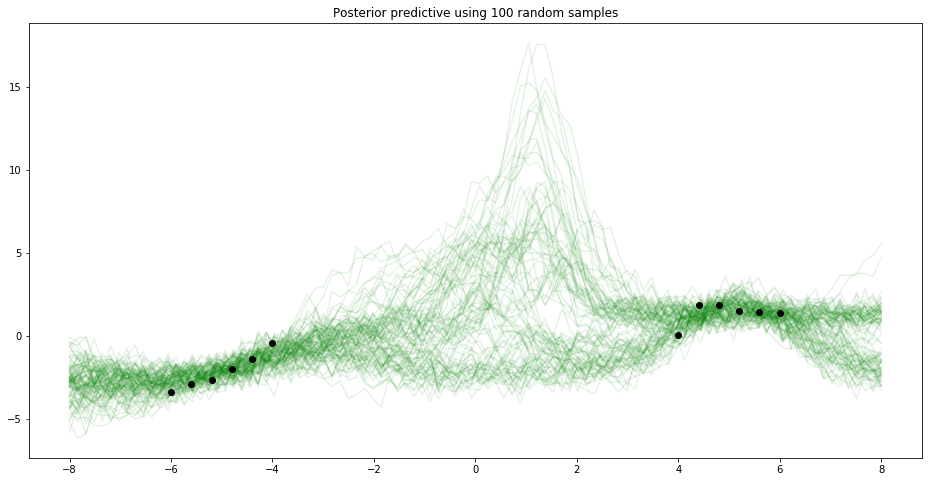

In [6]:
fig, ax = plt.subplots(figsize=(16,8))

posterior_predictive = np.load(f'results/posterior_predictive.npy')
data = pd.read_csv('data/data.csv')
x = data['x'].values
y = data['y'].values

n = 100
num_pts = 100
for i in range(n):
    x_test = np.linspace(-8, 8, num_pts)
    y_test = posterior_predictive[i]
    ax.plot(x_test, y_test, color='green', alpha=0.1)
    
ax.plot(x, y, 'o', color='black')
ax.set_title('Posterior predictive using {} random samples'.format(n));

---